## Vytváření matic v NumPy

In [ ]:
import numpy as np

# 1. Vytvoření matice z Pythonového seznamu
matrix1 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# 2. Vytvoření matice nul
zeros = np.zeros((3, 4))  # 3 řádky, 4 sloupce

# 3. Vytvoření matice jedniček
ones = np.ones((2, 5))  # 2 řádky, 5 sloupců

# 4. Vytvoření matice s konkrétní hodnotou
full = np.full((3, 3), 7)  # 3×3 matice naplněná číslem 7

# 5. Vytvoření jednotkové matice (s jedničkami na diagonále)
identity = np.eye(4)  # 4×4 jednotková matice

# 6. Vytvoření matice s náhodnými hodnotami (0-1)
random_uniform = np.random.random((2, 2))

# 7. Vytvoření matice s náhodnými hodnotami z normálního rozdělení
random_normal = np.random.normal(0, 1, (2, 3))  # střední hodnota=0, směrodatná odchylka=1

# 8. Vytvoření matice s lineárně rostoucími hodnotami
linear = np.linspace(0, 10, 5).reshape(5, 1)  # 5 hodnot mezi 0 a 10 jako sloupcový vektor

# 9. Vytvoření matice s aritmetickou posloupností
arange = np.arange(0, 9).reshape(3, 3)  # Hodnoty 0-8 jako matice 3×3

# 10. Vytvoření diagonální matice z pole hodnot
diag = np.diag([1, 2, 3, 4])  # Diagonální matice s hodnotami 1,2,3,4 na diagonále

## Práce s maticemi

In [ ]:
# Změna tvaru matice
matrix = np.arange(12)        # Vytvoří pole [0,1,2,...,11]
matrix = matrix.reshape(3, 4)  # Změní tvar na 3×4 matici

# Transpozice matice
transposed = matrix.T  # nebo matrix.transpose()

# Spojování matic
horz_concat = np.hstack((np.ones((2, 3)), np.zeros((2, 2))))  # Horizontální spojení
vert_concat = np.vstack((np.ones((2, 2)), np.zeros((1, 2))))  # Vertikální spojení

# Opakování matice
repeated = np.tile(np.array([[1, 2], [3, 4]]), (2, 3))  # Opakuje matici 2× vertikálně a 3× horizontálně

## Matice jako obrázek



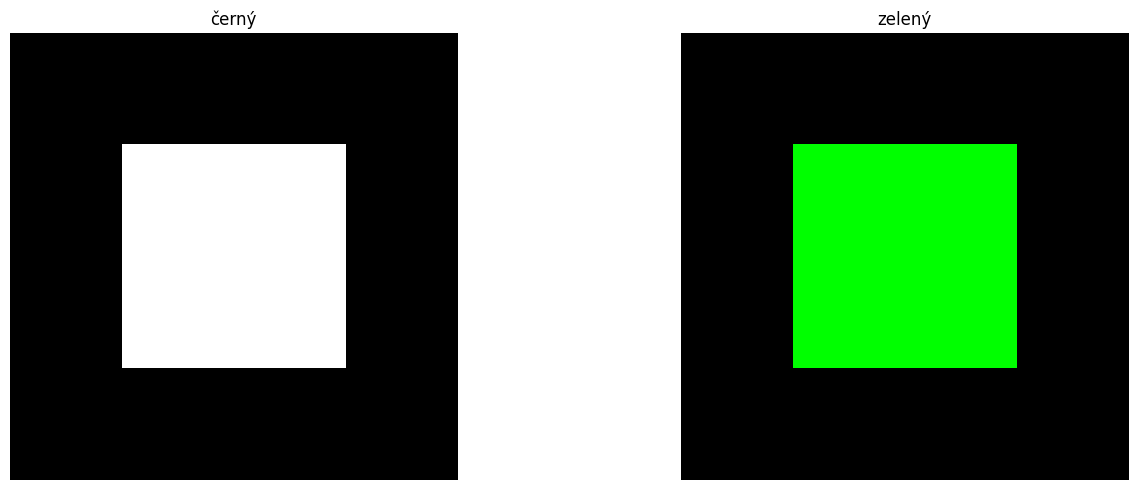

In [28]:
# Import potřebných knihoven
import numpy as np
import matplotlib.pyplot as plt

# Funkce pro zobrazení obrázků
def show_images(images, titles=None):

    if type(images) != list:
      images = [images]
      if titles:
        titles = [titles]
    if not titles:
      titles=[x.shape for x in images]

    fig, axes = plt.subplots(1, len(images), figsize=(15, 5))
    if len(images) == 1:
        axes = [axes]

    for i, (img, title) in enumerate(zip(images, titles)):
        if len(img.shape) == 2:
            axes[i].imshow(img, cmap='gray')
        else:
            axes[i].imshow(img)
        axes[i].set_title(title)
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

tmpimg1 = np.zeros((100, 100), dtype=np.uint8)
tmpimg1[25:75, 25:75] = 255  # Bílý čtverec uprostřed

tmpimg2 = np.zeros((100, 100, 3), dtype=np.uint8)
tmpimg2[25:75, 25:75, 1] = 255  # Zelený čtverec


show_images([tmpimg1,tmpimg2],["černý","zelený"])




**Úloha:** Nakreslete 9 bílých čtverců o straně 1/18 strany obrázku pravidleně rozmístěných ve velkém čtverci centrovaných v rastru 3x3.

**Úloha:** Nakreslete 6 barevných obdélníků rozmístěných ve velkém čtverci centrovaných v rastru 2x3.

**Úloha:** Namalujte nějakou verzi obrázku vysvětlujícího RGB míchání barev jako např.

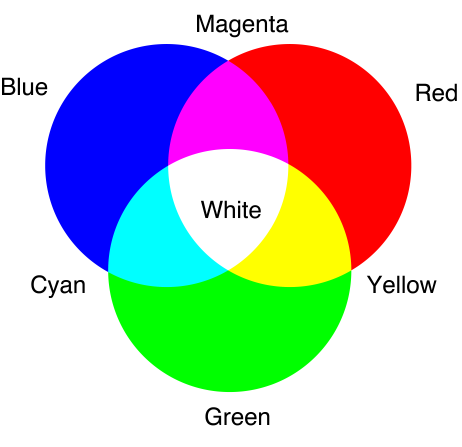


(Samozřejmě bez textových popisků.) Můžete se inspirovat následujícím kódem.

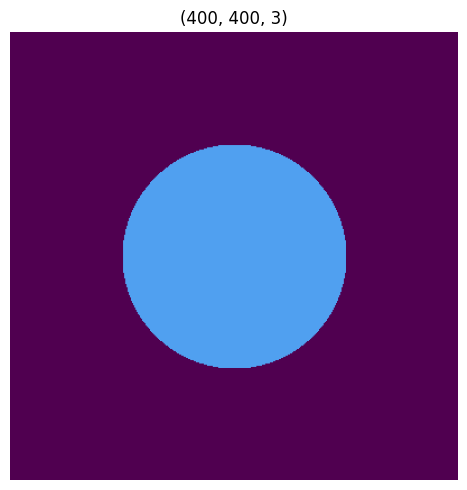

[255   0 255]


In [34]:
img3 = np.full((400, 400, 3), (80,0,80), dtype=np.uint8)

ny, nx, colordepth = img3.shape

for i in range(ny):
  for j in range(nx):
    if (i-nx/2)**2/nx**2+(j-ny/2)**2/ny**2 < 0.25**2:
      img3[j,i] = (80,160,240)

show_images(img3)

print(np.array([0,0,255])+(255,0,0))

In [ ]:
# random

**Úloha:** Nakreslete Maxwellův barevný trojúhelník

Viz též https://en.wikipedia.org/wiki/Viviani%27s_theorem

Všimněte si, že $r,g$ a $b$ (v interavalu $[0,1]$) můžete spočíst projekcí rozdílu $(\vec x-\vec A) $ na vektor kolmý k příslušné straně
$$
r =  \frac{(\vec x-\vec A) \cdot (\vec B-\vec A)^\perp }{(\vec B-\vec A)^2}
$$
kde podle orientace je $(x,y)^\perp=\pm(y,-x)$  tak aby $r>0$.

Výška rovnostranného trojúhelníka je $\sqrt{3}a/2$.

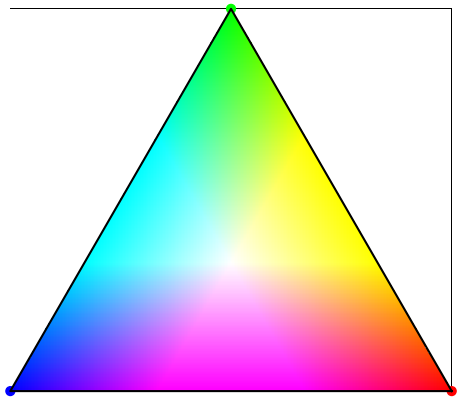

**Úloha:** Zkuste nakreslit https://en.wikipedia.org/wiki/Sierpi%C5%84ski_carpet


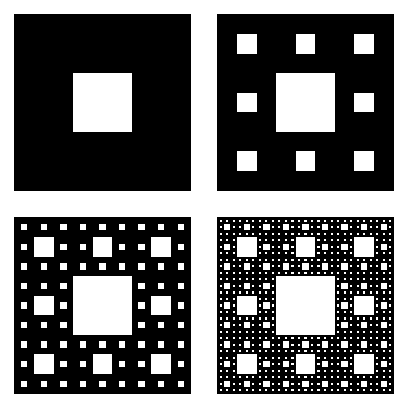

## Ukázka programu pro manipulaci s obrázkem

### Načtení a zobrazení vzorového obrázku - využívá černobílý obrázek kamery ze standardního datasetu.
### Definice různých typů kernelů:

   - Identity (původní obrázek)
   - Detekce hran
   - Zaostření (sharpening)
   - Box blur (rozmazání průměrováním)
   - Gaussian blur (Gaussovské rozmazání)
   - Sobelovy operátory pro detekci hran v ose X a Y

### Implementace konvoluce třemi způsoby:

 - Vlastní implementace - explicitně ukazuje, jak konvoluce funguje pomocí dvou vnořených cyklů
 - Implementace pomocí SciPy (knihovna ndimage)
 - Implementace pomocí OpenCV (nejoptimalizovanější varianta)

### Měření času jednotlivých implementací a jejich porovnání.

### Vizualizace výsledků všech tří implementací a ukázka aplikace všech kernelů.

Komentář:
Konvoluce je matematická operace, která se používá pro aplikaci filtrů na obrázky. Kernel (také nazývaný konvoluční matice) se aplikuje na každý pixel obrázku a jeho okolí. Výsledkem je nová hodnota pixelu, která je vypočítána jako vážený součet hodnot okolních pixelů, kde váhy jsou dány kernelovými koeficienty.

In [ ]:
# Import potřebných knihoven
from PIL import Image
import requests
from io import BytesIO
import time
from scipy import ndimage
import cv2


# Načtení vzorového obrázku
def load_sample_image():
    # Použijeme veřejně dostupný obrázek
    url = "https://raw.githubusercontent.com/scikit-image/scikit-image/master/skimage/data/camera.png"
    try:
        response = requests.get(url)
        img = np.array(Image.open(BytesIO(response.content)).convert('L'))  # Převedeme na černobílý
        return img
    except:
        # Pokud se nepodaří načíst obrázek z internetu, vytvoříme jednoduchý testovací obrázek
        print("Nepodařilo se načíst obrázek z internetu, používám testovací obrázek.")
        img = np.zeros((100, 100), dtype=np.uint8)
        img[25:75, 25:75] = 255  # Bílý čtverec uprostřed
        return img

# Definice různých kernelů
def get_kernels():
    # Různé typy kernelů
    kernels = {
        'identity': np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]]),
        'edge_detection': np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]),
        'sharpen': np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]),
        'box_blur': np.ones((3, 3)) / 9,
        'gaussian_blur': np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) / 16,
        'sobel_x': np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]),
        'sobel_y': np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    }
    return kernels

# Vlastní implementace konvoluce
def apply_kernel_manually(image, kernel):
    # Zajistíme, že obrázek i kernel jsou typu float pro přesnější výpočty
    image = image.astype(float)
    kernel = kernel.astype(float)

    # Rozměry obrázku a kernelu
    img_height, img_width = image.shape
    k_height, k_width = kernel.shape

    # Výpočet paddingu
    pad_h = k_height // 2
    pad_w = k_width // 2

    # Inicializace výstupního obrázku
    output = np.zeros_like(image)

    # Aplikace konvoluce
    for i in range(pad_h, img_height - pad_h):
        for j in range(pad_w, img_width - pad_w):
            # Pro každý pixel vypočítáme sumu součinů hodnot v okolí s kernelem
            sum_val = 0
            for ki in range(-pad_h, pad_h + 1):
                for kj in range(-pad_w, pad_w + 1):
                    sum_val += image[i + ki, j + kj] * kernel[pad_h + ki, pad_w + kj]
            output[i, j] = sum_val

    # Ořezání hodnot do rozsahu 0-255
    output = np.clip(output, 0, 255)
    return output.astype(np.uint8)

# Funkce používající knihovní implementace
#def apply_kernel_scipy(image, kernel):
#    return ndimage.convolve(image.astype(float), kernel, mode='constant', cval=0.0).astype(np.uint8)

def apply_kernel_scipy(image, kernel):
    result = ndimage.convolve(image.astype(float), kernel, mode='constant', cval=0.0)
    result = np.clip(result, 0, 255)  # Ořežeme hodnoty do rozsahu 0-255
    return result.astype(np.uint8)

def apply_kernel_cv2(image, kernel):
    return cv2.filter2D(image, -1, kernel)



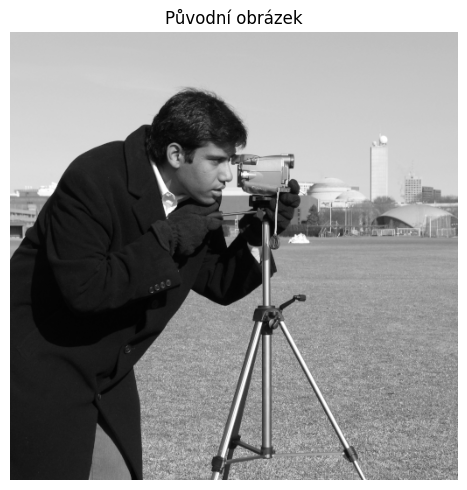

In [ ]:
# Načtení obrázku
image = load_sample_image()
show_images([image], ["Původní obrázek"])



In [ ]:
kernels[selected_kernel_name]

array([[-1, -1, -1],
       [-1,  8, -1],
       [-1, -1, -1]])

Používaný kernel (edge_detection):
[[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]]
Čas vlastní implementace: 1.4953 sekund
Čas scipy implementace: 0.0059 sekund
Čas OpenCV implementace: 0.0011 sekund


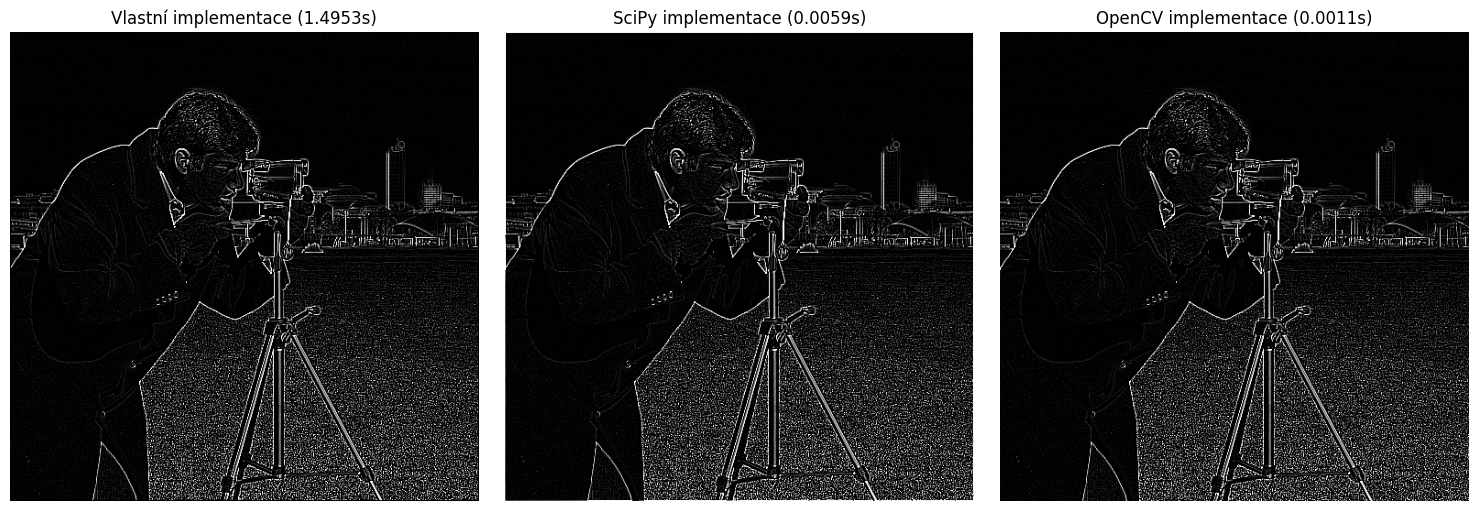


Porovnání rychlosti (relativní k vlastní implementaci):
Vlastní implementace: 1.0x
SciPy implementace: 252.83x rychlejší
OpenCV implementace: 1394.38x rychlejší


In [ ]:
# Získání kernelů
kernels = get_kernels()

# Vybíráme jeden kernel pro ukázku (například edge detection)
selected_kernel_name = 'edge_detection'
kernel = kernels[selected_kernel_name]

print(f"Používaný kernel ({selected_kernel_name}):")
print(kernel)

# Měření času pro vlastní implementaci
start_time = time.time()
manual_result = apply_kernel_manually(image, kernel)
manual_time = time.time() - start_time
print(f"Čas vlastní implementace: {manual_time:.4f} sekund")

# Měření času pro scipy implementaci
start_time = time.time()
scipy_result = apply_kernel_scipy(image, kernel)
scipy_time = time.time() - start_time
print(f"Čas scipy implementace: {scipy_time:.4f} sekund")

# Měření času pro OpenCV implementaci
start_time = time.time()
cv2_result = apply_kernel_cv2(image, kernel)
cv2_time = time.time() - start_time
print(f"Čas OpenCV implementace: {cv2_time:.4f} sekund")

# Zobrazení výsledků
show_images(
    [manual_result, scipy_result, cv2_result],
    [
        f"Vlastní implementace ({manual_time:.4f}s)",
        f"SciPy implementace ({scipy_time:.4f}s)",
        f"OpenCV implementace ({cv2_time:.4f}s)"
    ]
)

# Porovnání rychlosti
print("\nPorovnání rychlosti (relativní k vlastní implementaci):")
print(f"Vlastní implementace: 1.0x")
print(f"SciPy implementace: {manual_time/scipy_time:.2f}x rychlejší")
print(f"OpenCV implementace: {manual_time/cv2_time:.2f}x rychlejší")



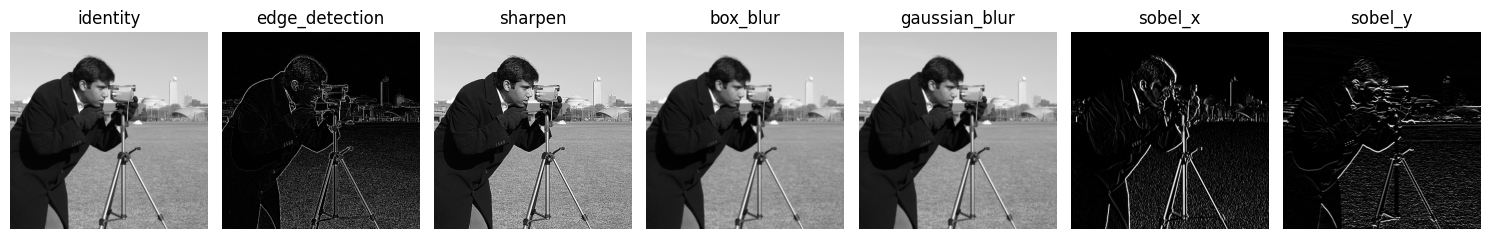

In [ ]:
# Ukázka aplikace dalších kernelů pomocí OpenCV (nejrychlejší metoda)
kernel_results = []
kernel_names = []

for name, k in kernels.items():
    kernel_results.append(cv2_result if name == selected_kernel_name else cv2.filter2D(image, -1, k))
    kernel_names.append(name)

show_images(kernel_results, kernel_names)